<a href="https://colab.research.google.com/github/baraa-hakawati/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Author: Baraa A. Hakawati

## Project Overview


## Load and Inspect Data

In [32]:
# Import required packages
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# Read the dataset
path = '/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(path)
# General info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [34]:
# Display first 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

In [35]:
# Display the number of rows and columns within the dataset
print(f"The number of records within the dataset (rows) is : {df.shape[0]}")
print(f"The mumber of features within the dataset (columns) is: {df.shape[1]}")

The number of records within the dataset (rows) is : 8523
The mumber of features within the dataset (columns) is: 12


In [36]:
print("\nThe datatypes of each feature in the data set (variable or columns) is:")
df.dtypes


The datatypes of each feature in the data set (variable or columns) is:


,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [37]:
# Check whether duplicates are included within the data
print(f"\nThere are {df.duplicated().sum()} duplicated records within the data")
# Droping duplicates if any exist
df = df.drop_duplicates()


There are 0 duplicated records within the data


In [38]:
# Identify missing values
print("\nMissing values in each feature are:")
df.isnull().sum()


Missing values in each feature are:


,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [39]:
# Address missing values by using a placeholder value
# Starting with fill missing values in categorical columns with "MISSING"
cat_col = df.select_dtypes(include=['object']).columns
for col in cat_col:
    df[col] = df[col].fillna('MISSING')
#Movinf to fill missing values in numeric columns with -1
num_col = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_col:
    df[col] = df[col].fillna(-1)

In [40]:
# Confirm that there are no missing values after addressing
print("\nMissing values after cleaning drown as:")
print(df.isnull().sum())


Missing values after cleaning drown as:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [41]:
#Fix inconsistent categories of data
cat_list = cat_col.tolist()
for col in cat_list:
  print(f'\nThe values counting included in {col} are:')
  print( df.value_counts(col))


The values counting included in Item_Identifier are:
Item_Identifier
FDG33    10
FDW13    10
NCL31     9
FDX04     9
NCQ06     9
         ..
FDN52     1
FDC23     1
FDT35     1
DRF48     1
FDE52     1
Name: count, Length: 1559, dtype: int64

The values counting included in Item_Fat_Content are:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

The values counting included in Item_Type are:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

The values coun

In [42]:
# We have to fix inconsistent categories in the feature of Item_Fat_Content
cons_itm_fat = {'LF': 'Low Fat','low fat': 'Low Fat', 'reg': 'Regular'}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(cons_itm_fat)
#In order to verify the changes
print("Value counts for Item_Fat_Content after handiling the drtected inconsistencies:")
df['Item_Fat_Content'].value_counts()

Value counts for Item_Fat_Content after handiling the drtected inconsistencies:


,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


## Exploratory Data Analysis

In [60]:
# Define the numerical columns in the dataset
num_col = df.select_dtypes(include=['float64','int64']).columns
df[num_col]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


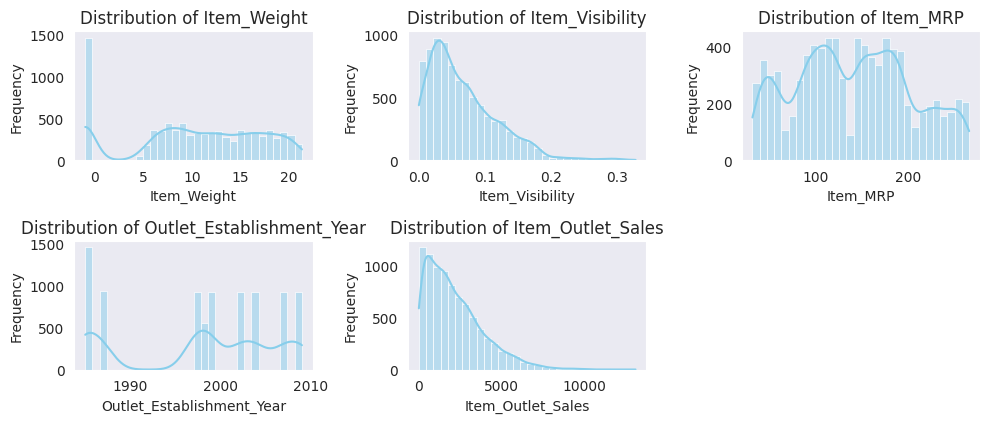

In [100]:
sns.set_style("dark")
# Define the subplot grid size
num_fea = len(num_col)
# In order to ensure  that we have enough rows
num_rows = (numea // 2_f) + (num_fea % 2)
# Initialize the overall plot
plt.figure(figsize=(10, 2 * num_rows))
# Loop through numerical columns
for i, feature in enumerate(num_col, 1):
    plt.subplot(num_rows, 3, i)  # Adjust rows dynamically
    # Histograms for numerical features
    sns.histplot(df[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
# Save histograms
plt.savefig("/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week03/histograms.png")
plt.show()

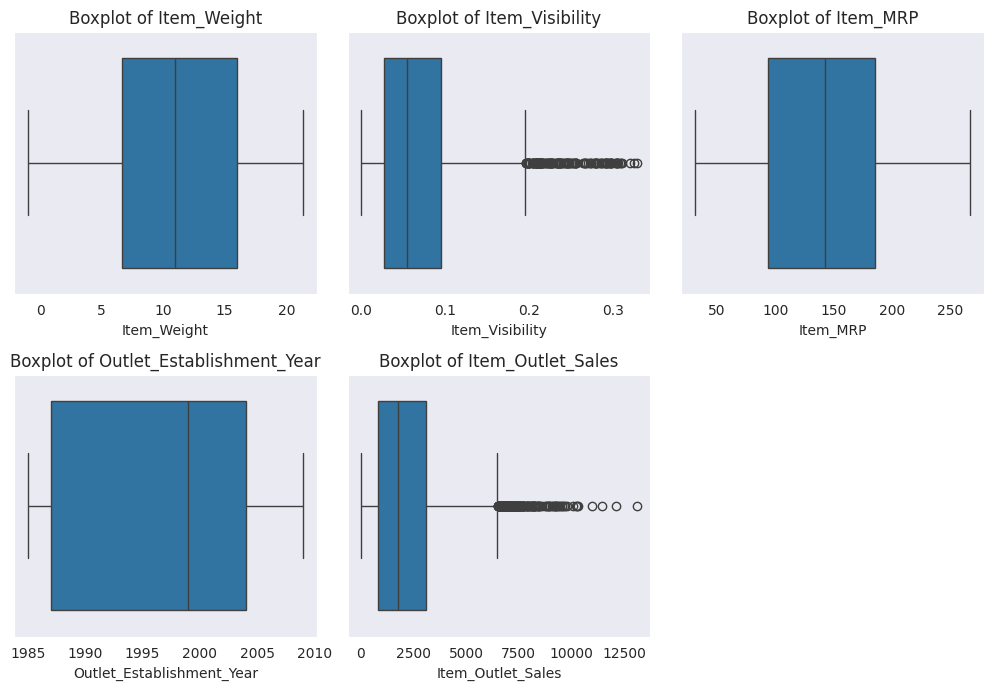

In [99]:
# Boxplots for numerical features
plt.figure(figsize=(10, 2 * num_fea))
for i, feature in enumerate(num_col, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week03/Boxplots.png")
plt.show()

In [83]:
df[cat_col]

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,MISSING,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,MISSING,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


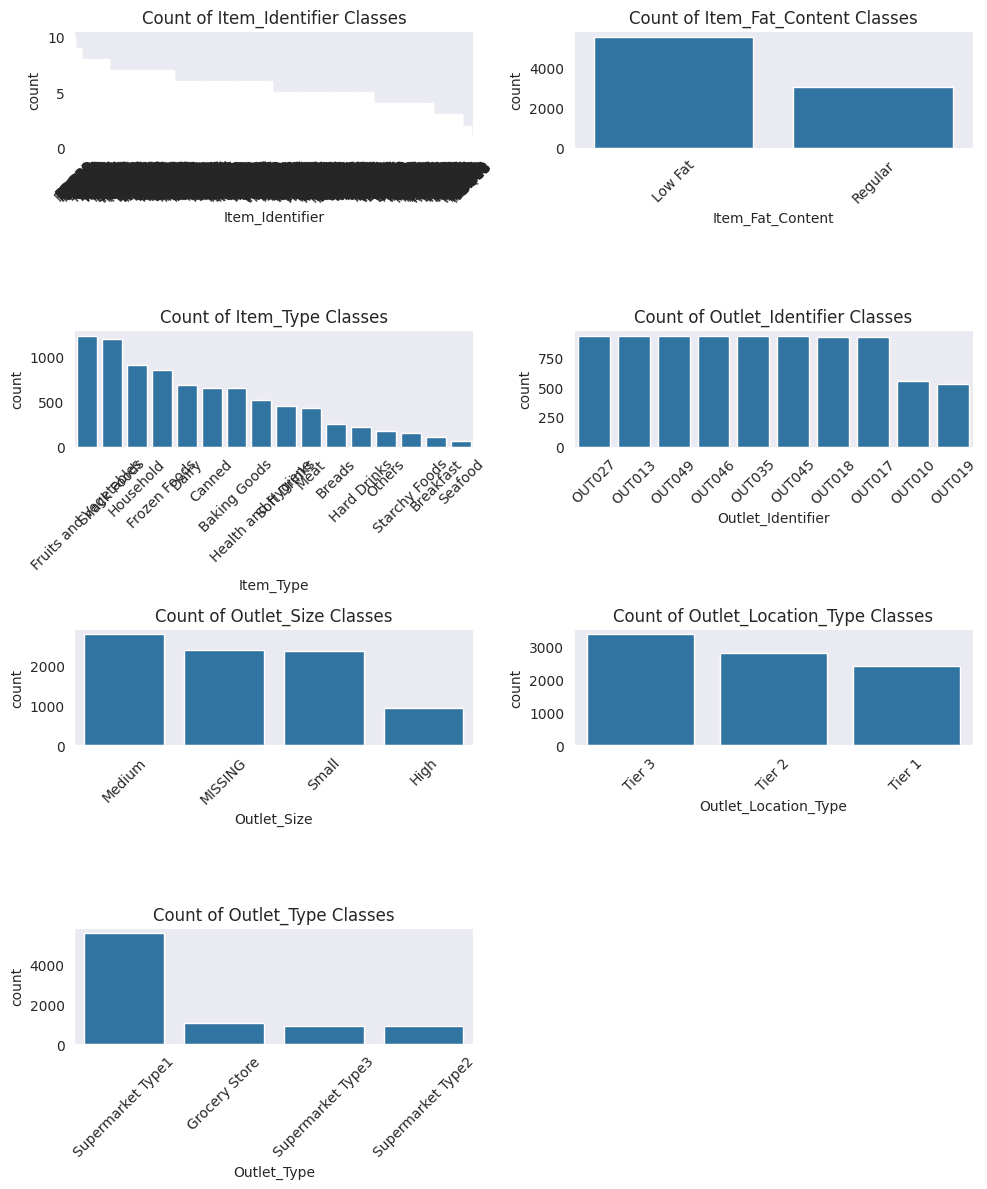

In [97]:
num_cat_fea = len(cat_col)
cat_rows = (num_cat_fea // 2) + (num_cat_fea % 2)
# Countplots for categorical features
plt.figure(figsize=(10,3 * cat_rows))
for i, feature in enumerate(cat_col, 1):
    plt.subplot(cat_rows, 2, i)
    sns.countplot(x=df[feature], order=df[feature].value_counts().index)
    plt.title(f'Count of {feature} Classes')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week03/Countplots.png")
plt.show()

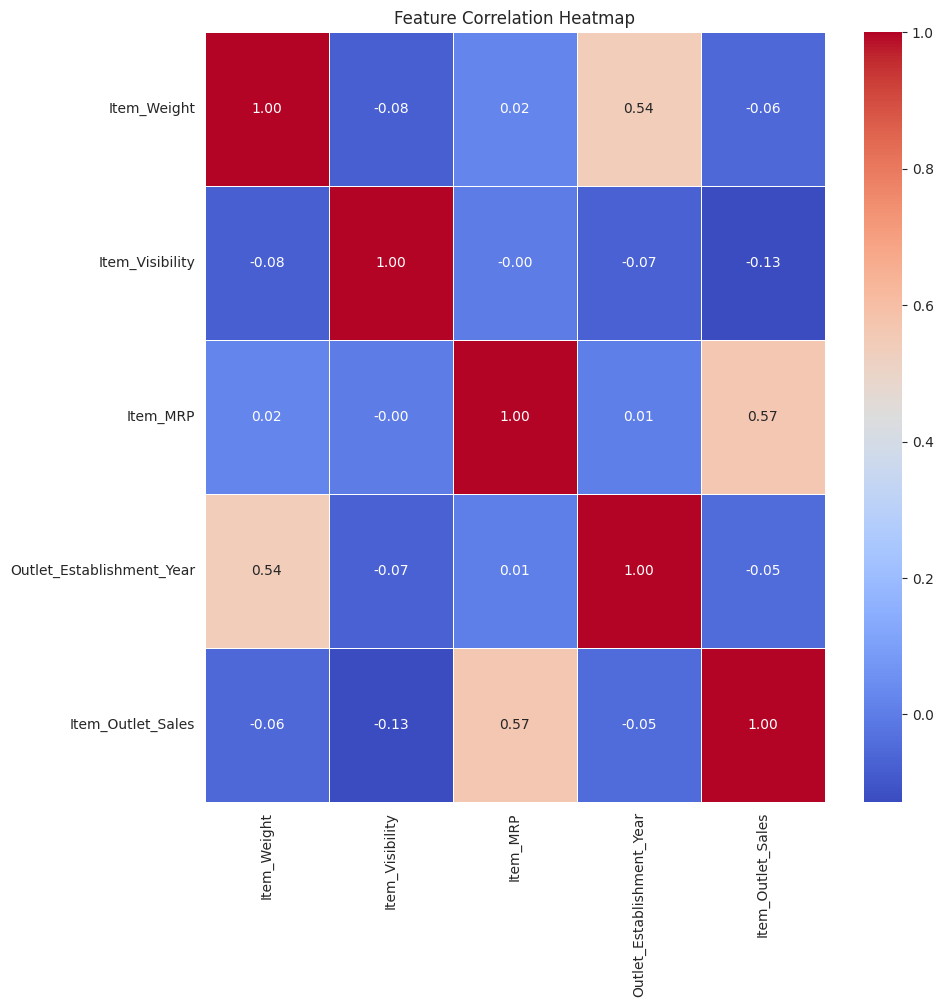

In [101]:
# Heatmap for correlations
plt.figure(figsize=(10, 2 * num_fea))
corr = df[num_col].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.savefig("/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week03/Heatmap.png")
plt.show()

## Feature Inspection